In [1]:
# package imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import pickle

In [2]:
# get data
data = pd.read_pickle('../../data/processed/all_samples.pickle')
data['datetime'] = pd.to_datetime(data.date)
data['day'] = data.datetime.dt.weekday_name
data = pd.get_dummies(data, prefix='day', columns=['day'])

In [3]:
# feature/label columns
features = ['hour',
            'daylight_yn',
            'holiday_yn',
            'rush_hour_yn',
            'temp',
            'wind_speed',
            'precipitation',
            'road_length',
            'class_freeway',
            'class_local',
            'class_major',
            'class_other',
            'class_unimproved',
            'day_Monday',
            'day_Tuesday',
            'day_Wednesday',
            'day_Thursday',
            'day_Friday',
            'day_Saturday',
            'day_Sunday']

labels = 'accident_yn'

In [4]:
# feature/label variables
X = data[features]
y = data[labels]

In [5]:
# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [6]:
# base model RF
base_model = RandomForestClassifier(random_state=42)

In [7]:
# Define grids for GridSearchCV
grid_max_depth = {'max_depth': [10, 32, 55, 77, 100, None]}
grid_min_samples_leaf = {'min_samples_leaf': [1, 2, 4, 6, 7, 10]}
grid_min_samples_split = {'min_samples_split': [2, 5, 8, 12]}
grid_n_estimators = {'n_estimators': [50, 75, 100, 125, 150]}
scores = ['accuracy', 'precision', 'recall']

In [8]:
# GridSearch on max_depth
search_max_depth = GridSearchCV(base_model, 
                                param_grid=grid_max_depth, 
                                n_jobs=-1, 
                                cv=3, 
                                scoring=scores, 
                                refit=False,
                                verbose=2)
search_max_depth.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 32, 55, 77, 100, None]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['accuracy', 'precision', 'recall'], verbose=2)

In [9]:
# GridSearch on min_samples_leaf
search_min_samples_leaf = GridSearchCV(base_model, 
                                       param_grid=grid_min_samples_leaf, 
                                       n_jobs=-1, 
                                       cv=3, 
                                       scoring=scores, 
                                       refit=False,
                                       verbose=2)
search_min_samples_leaf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [1, 2, 4, 6, 7, 10]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['accuracy', 'precision', 'recall'], verbose=2)

In [10]:
# GridSearch on min_samples_split
search_min_samples_split = GridSearchCV(base_model, 
                                        param_grid=grid_min_samples_split, 
                                        n_jobs=-1, 
                                        cv=3, 
                                        scoring=scores, 
                                        refit=False,
                                        verbose=2)
search_min_samples_split.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   48.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   48.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 5, 8, 12]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['accuracy', 'precision', 'recall'], verbose=2)

In [11]:
# GridSearch on n_estimators
search_n_estimators = GridSearchCV(base_model, 
                                   param_grid=grid_n_estimators, 
                                   n_jobs=-1, 
                                   cv=3, 
                                   scoring=scores, 
                                   refit=False,
                                   verbose=2)
search_n_estimators.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 75, 100, 125, 150]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=['accuracy', 'precision', 'recall'], verbose=2)

In [12]:
# save results
f = open('../../data/processed/search_max_depth.pickle', 'wb')
pickle.dump(search_max_depth, f)
f.close()

f = open('../../data/processed/search_min_samples_leaf.pickle', 'wb')
pickle.dump(search_min_samples_leaf, f)
f.close()

f = open('../../data/processed/search_min_samples_split.pickle', 'wb')
pickle.dump(search_min_samples_split, f)
f.close()

f = open('../../data/processed/search_n_estimators.pickle', 'wb')
pickle.dump(search_n_estimators, f)
f.close()

In [13]:
# function to plot results
def plot_results(model, param, name):
    param_name = 'param_%s' % param
    
    # get scores
    accuracy_scores = model.cv_results_['mean_test_accuracy']
    precision_scores = model.cv_results_['mean_test_precision']
    recall_scores = model.cv_results_['mean_test_recall']
    param_range = list(model.cv_results_[param_name])
    
    # plot
    plt.plot(param_range, accuracy_scores, 'g-', label='accuracy')
    plt.plot(param_range, precision_scores, 'b-', label='precision')
    plt.plot(param_range, recall_scores, 'r-', label='recall')
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Metrics')
    plt.title('Score vs %s' % name)


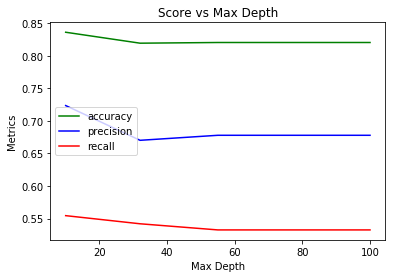

In [14]:
plot_results(search_max_depth, 'max_depth', 'Max Depth')

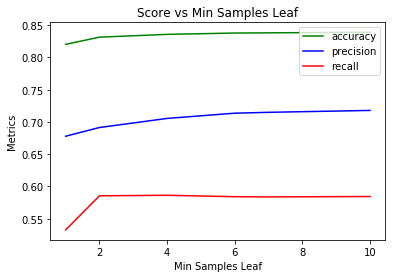

In [15]:
plot_results(search_min_samples_leaf, 'min_samples_leaf', 'Min Samples Leaf')

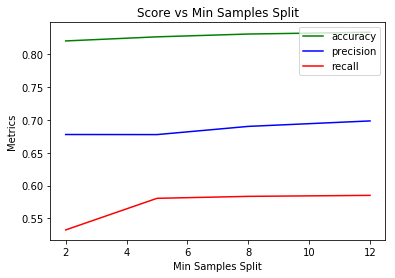

In [16]:
plot_results(search_min_samples_split, 'min_samples_split', 'Min Samples Split')

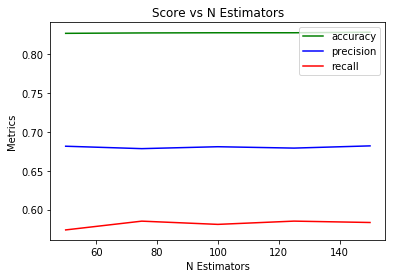

In [17]:
plot_results(search_n_estimators, 'n_estimators', 'N Estimators')